# Open and Plot Data {.unnumbered}

This notebook demonstrates how to open the plot data using `rioxarray`, `stackstac` and `satsarch`.

* Author: Aimee Barciauskas
* Lasted Updated Date: June 28, 2022

In [1]:
import rioxarray
import stackstac
from satsearch import Search
import rasterio as rio
import matplotlib.pyplot as plt

# Accessing the data

The data is in a protected bucket. Please request access by emailng aimee@developmentseed.org providing your affiliation, interest in or expected use of the dataset, and an AWS IAM role or user Amazon Resource Name (ARN). Once you have provided the role you will use to access the data, the team will add that role or user ARN to the permitted list of identities which can assume a role with read access to the data. The code in `create_rio_session.py` can then be used to assume this read-access role, identified in that code by the environment variable `AWS_ROLE`.

In [2]:
%run -i 'create_rio_session.py'

# Declare your collection of interest

You can discover available collections the following ways:

* Use the `{STAC_API_URL}/collections` API endpoint (JSON response)
* Programmatically using `pystac` (see example in the `list-collections.ipynb` notebook
* In the STAC Browser: http://delta-staging-stac-browser.s3-website-us-east-1.amazonaws.com/

In [3]:
STAC_API_URL = 'https://staging-stac.delta-backend.xyz/'
collection = 'social-vulnerability-index-overall-nopop'

## Use satsearch to discover items in the social-vulnerability-index-socioeconomic-nopop collection

In [4]:
search = Search.search(
    url=STAC_API_URL,
    collections=[collection],
    limit=10
)
items = search.items()

url is https://staging-stac.delta-backend.xyz/search
headers is None
kwargs is {'limit': 10, 'collections': ['social-vulnerability-index-overall-nopop']}


In [5]:
len(items)

5

## Create an `xarray.DataArray`

In [6]:
s3_link = items[0].assets['cog_default']['href']
da = rioxarray.open_rasterio(s3_link)
da

<xarray.DataArray (band: 1, y: 6297, x: 13353)>
[84083841 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -178.2 -178.2 -178.2 ... -66.98 -66.97 -66.96
  * y            (y) float64 71.38 71.37 71.36 71.35 ... 18.94 18.93 18.92 18.91
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.3999999521443642e+38
    scale_factor:  1.0
    add_offset:    0.0

In [7]:
da = da.squeeze('band', drop=True)
da

<xarray.DataArray (y: 6297, x: 13353)>
[84083841 values with dtype=float32]
Coordinates:
  * x            (x) float64 -178.2 -178.2 -178.2 ... -66.98 -66.97 -66.96
  * y            (y) float64 71.38 71.37 71.36 71.35 ... 18.94 18.93 18.92 18.91
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.3999999521443642e+38
    scale_factor:  1.0
    add_offset:    0.0

/Users/aimeebarciauskas/miniconda3/lib/python3.9/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


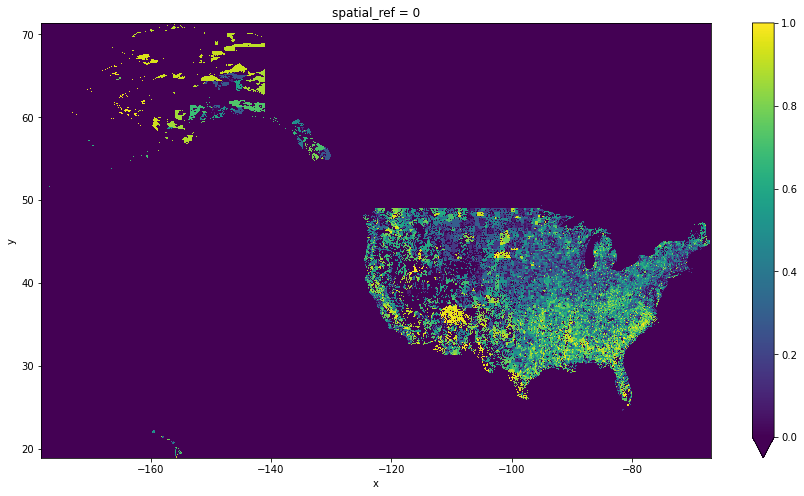

In [8]:
plt.figure(figsize=[15, 8])
da.plot(x='x', y='y', vmin=0, vmax=1)